In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import QTable, Table, Column
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tsa.ar_model import AutoReg

In [4]:
# Load the data
GSK_2020 = pd.read_csv('data/GSK_2020.csv',index_col=0, parse_dates=True)
JNJ_2020 = pd.read_csv('data/JNJ_2020.csv',index_col=0, parse_dates=True)

In [5]:
#Add log value of price
GSK_2020['log_Adj_Close'] = np.log(GSK_2020['Adj Close'])
JNJ_2020['log_Adj_Close'] = np.log(JNJ_2020['Adj Close'])

In [40]:
# Actual Value 1
GSK_actual_2020 = GSK_2020['log_Adj_Close'][2:]
JNJ_actual_2020 = JNJ_2020['log_Adj_Close'][2:]

In [43]:
# Actual Value 2
GSK_actual_2020 = GSK_2020['log_Adj_Close'][5:]
JNJ_actual_2020 = JNJ_2020['log_Adj_Close'][5:]

In [7]:
def base_prediction_1(stock):
    pred_base = []
    base_xtrain = []
    base_ytrain = []
    for i in range(len(stock)-2):
        base_xtrain.append(stock.iloc[i]['log_Adj_Close'])
        base_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(base_xtrain).reshape(-1,1)
        temp_y = np.array(base_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close']]) + model.intercept_
        # Store the prediction 
        pred_base.append(yhat[0])
        
    return pred_base

In [8]:
def base_prediction_2(stock):
    pred_base = []
    base_xtrain = []
    base_ytrain = []
    for i in range(len(stock)-5):
        base_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+3]['log_Adj_Close']])
        base_ytrain.append(stock.iloc[i+4]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(base_xtrain).reshape(-1,2)
        temp_y = np.array(base_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+4]['log_Adj_Close']]) + model.intercept_
        # Store the prediction 
        pred_base.append(yhat[0])
        
    return pred_base

In [16]:
def gt_prediction_1(stock, var):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1][var]])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,2)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2][var]]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [10]:
def gt_prediction_2(stock, var):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-5):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+3]['log_Adj_Close'], stock.iloc[i+4][var]])
        trends_ytrain.append(stock.iloc[i+4]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,3)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+4]['log_Adj_Close'],stock.iloc[i+5][var]]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [11]:
def trends_prediction_1(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Vaccine'],stock.iloc[i+1]['Flu']])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,4)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2]['Virus'],stock.iloc[i+2]['Vaccine'],stock.iloc[i+2]['Flu']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [12]:
def trends_prediction_2(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-5):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+3]['log_Adj_Close'],stock.iloc[i+4]['Virus'],stock.iloc[i+4]['Vaccine'],stock.iloc[i+4]['Flu']])
        trends_ytrain.append(stock.iloc[i+4]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,5)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+4]['log_Adj_Close'],stock.iloc[i+5]['Virus'],stock.iloc[i+5]['Vaccine'],stock.iloc[i+5]['Flu']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [38]:
GSK_base_2020 = base_prediction_1(GSK_2020)
JNJ_base_2020 = base_prediction_1(JNJ_2020)
GSK_virus_2020 = gt_prediction_1(GSK_2020, 'Virus')
JNJ_virus_2020 = gt_prediction_1(JNJ_2020, 'Virus')
GSK_vaccine_2020 = gt_prediction_1(GSK_2020, 'Vaccine')
JNJ_vaccine_2020 = gt_prediction_1(JNJ_2020, 'Vaccine')
GSK_flu_2020 = gt_prediction_1(GSK_2020, 'Flu')
JNJ_flu_2020 = gt_prediction_1(JNJ_2020, 'Flu')
GSK_trends_2020 = trends_prediction_1(GSK_2020)
JNJ_trends_2020 = trends_prediction_1(JNJ_2020)

[[ 8.08297079e-01 -6.08942403e-04]]
[[ 0.36656439 -0.00129449]]
[[ 7.69285279e-01 -5.23359483e-04]]
[[ 7.00557052e-01 -2.86612532e-05]]
[[ 8.16959379e-01 -7.97708982e-04]]
[[ 0.4362448  -0.00124779]]
[[ 0.71538931  0.00138703 -0.00084272 -0.00227031]]
[[ 3.56059994e-01 -1.37995117e-03  1.97432130e-04  3.90234060e-05]]


In [18]:
MAE_GSK_base_2020_1 = MAE(GSK_base_2020,GSK_actual_2020)
MAE_JNJ_base_2020_1 = MAE(JNJ_base_2020,JNJ_actual_2020)
MAE_GSK_virus_2020_1 = MAE(GSK_virus_2020,GSK_actual_2020)
MAE_JNJ_virus_2020_1 = MAE(JNJ_virus_2020,JNJ_actual_2020)
MAE_GSK_vaccine_2020_1 = MAE(GSK_vaccine_2020,GSK_actual_2020)
MAE_JNJ_vaccine_2020_1 = MAE(JNJ_vaccine_2020,JNJ_actual_2020)
MAE_GSK_flu_2020_1 = MAE(GSK_flu_2020,GSK_actual_2020)
MAE_JNJ_flu_2020_1 = MAE(JNJ_flu_2020,JNJ_actual_2020)
MAE_GSK_trends_2020_1 = MAE(GSK_trends_2020,GSK_actual_2020)
MAE_JNJ_trends_2020_1 = MAE(JNJ_trends_2020,JNJ_actual_2020)

In [44]:
GSK_base_2020 = base_prediction_2(GSK_2020)
JNJ_base_2020 = base_prediction_2(JNJ_2020)
GSK_virus_2020 = gt_prediction_2(GSK_2020, 'Virus')
JNJ_virus_2020 = gt_prediction_2(JNJ_2020, 'Virus')
GSK_vaccine_2020 = gt_prediction_2(GSK_2020, 'Vaccine')
JNJ_vaccine_2020 = gt_prediction_2(JNJ_2020, 'Vaccine')
GSK_flu_2020 = gt_prediction_2(GSK_2020, 'Flu')
JNJ_flu_2020 = gt_prediction_2(JNJ_2020, 'Flu')
GSK_trends_2020 = trends_prediction_2(GSK_2020)
JNJ_trends_2020 = trends_prediction_2(JNJ_2020)

[[ 4.84545158e-03  7.71592480e-01 -5.85415564e-04]]
[[-0.21154806  0.34358499 -0.00148708]]
[[-1.22701388e-01  8.05545559e-01 -6.12541003e-04]]
[[-1.67797272e-01  7.40277355e-01 -1.30995043e-05]]
[[ 0.04126677  0.75068853 -0.00083766]]
[[-0.16176526  0.45260416 -0.00128782]]
[[-0.02439599  0.71412095  0.00146047 -0.00078388 -0.00230058]]
[[-2.29834780e-01  3.32860834e-01 -2.03291338e-03  1.69934704e-04
   5.75603883e-04]]


In [34]:
MAE_GSK_base_2020_2 = MAE(GSK_base_2020,GSK_actual_2020)
MAE_JNJ_base_2020_2 = MAE(JNJ_base_2020,JNJ_actual_2020)
MAE_GSK_virus_2020_2 = MAE(GSK_virus_2020,GSK_actual_2020)
MAE_JNJ_virus_2020_2 = MAE(JNJ_virus_2020,JNJ_actual_2020)
MAE_GSK_vaccine_2020_2 = MAE(GSK_vaccine_2020,GSK_actual_2020)
MAE_JNJ_vaccine_2020_2 = MAE(JNJ_vaccine_2020,JNJ_actual_2020)
MAE_GSK_flu_2020_2 = MAE(GSK_flu_2020,GSK_actual_2020)
MAE_JNJ_flu_2020_2 = MAE(JNJ_flu_2020,JNJ_actual_2020)
MAE_GSK_trends_2020_2 = MAE(GSK_trends_2020,GSK_actual_2020)
MAE_JNJ_trends_2020_2 = MAE(JNJ_trends_2020,JNJ_actual_2020)

In [22]:
# Make the table
data_rows = (["Base MAE", round(MAE_GSK_base_2020_1, 5), round(MAE_JNJ_base_2020_1, 5)],
             ["Trends MAE", round(MAE_GSK_trends_2020_1, 5), round(MAE_JNJ_trends_2020_1, 5)],
            ["Vaccine MAE", round(MAE_GSK_vaccine_2020_1, 5), round(MAE_JNJ_vaccine_2020_1, 5)],
            ["Virus MAE", round(MAE_GSK_virus_2020_1, 5), round(MAE_JNJ_virus_2020_1, 5)],
            ["Flu MAE", round(MAE_GSK_flu_2020_1, 5), round(MAE_JNJ_flu_2020_1, 5)])
t1 = Table(rows=data_rows, names=('MAE Type', 'GSK', 'JNJ'))
#print(' Behavio of MAE around Turning Points - Period 1')
print(t1)

  MAE Type    GSK     JNJ  
----------- ------- -------
   Base MAE 0.03423 0.02968
 Trends MAE 0.03773 0.03284
Vaccine MAE 0.03794  0.0348
  Virus MAE 0.03766 0.02736
    Flu MAE 0.03852 0.02927


In [35]:
# Make the table
data_rows = (["Base MAE", round(MAE_GSK_base_2020_2, 5), round(MAE_JNJ_base_2020_2, 5)],
             ["Trends MAE", round(MAE_GSK_trends_2020_2, 5), round(MAE_JNJ_trends_2020_2, 5)],
            ["Vaccine MAE", round(MAE_GSK_vaccine_2020_2, 5), round(MAE_JNJ_vaccine_2020_2, 5)],
            ["Virus MAE", round(MAE_GSK_virus_2020_2, 5), round(MAE_JNJ_virus_2020_2, 5)],
            ["Flu MAE", round(MAE_GSK_flu_2020_2, 5), round(MAE_JNJ_flu_2020_2, 5)])
t1 = Table(rows=data_rows, names=('MAE Type', 'GSK', 'JNJ'))
#print(' Behavio of MAE around Turning Points - Period 1')
print(t1)

  MAE Type    GSK     JNJ  
----------- ------- -------
   Base MAE 0.03615 0.02877
 Trends MAE 0.07762 0.06155
Vaccine MAE 0.03896 0.03802
  Virus MAE 0.03985 0.02758
    Flu MAE 0.03988 0.03022


In [36]:
def plot_1(stock, actual, base, trends):
    plt.plot(stock.index[2:], actual, color='black', label='Actual')
    plt.plot(stock.index[2:], base, color='black', label='Base', linestyle=":")
    plt.plot(stock.index[2:], trends, color='gray', label='trends')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Stock Price')

In [37]:
def plot_2(stock, actual, base, trends):
    plt.plot(stock.index[5:], actual, color='black', label='Actual')
    plt.plot(stock.index[5:], base, color='black', label='Base', linestyle=":")
    plt.plot(stock.index[5:], trends, color='gray', label='trends')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Stock Price')

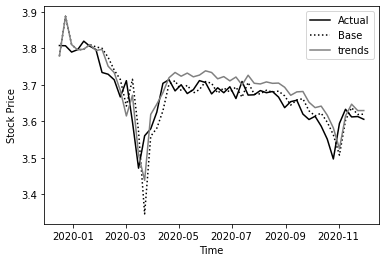

In [41]:
plot_1(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_virus_2020)

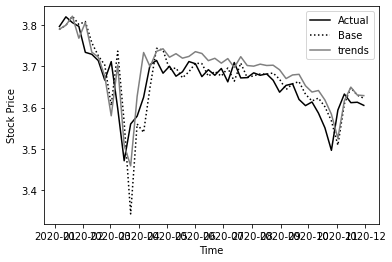

In [46]:
plot_2(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_virus_2020)

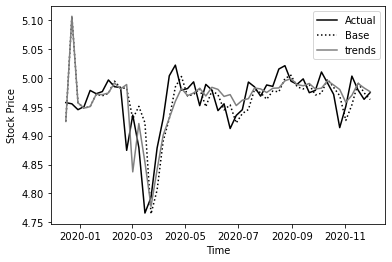

In [42]:
plot_1(JNJ_2020, JNJ_actual_2020, JNJ_base_2020, JNJ_virus_2020)

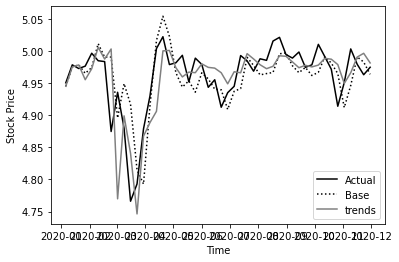

In [45]:
plot_2(JNJ_2020, JNJ_actual_2020, JNJ_base_2020, JNJ_virus_2020)